# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

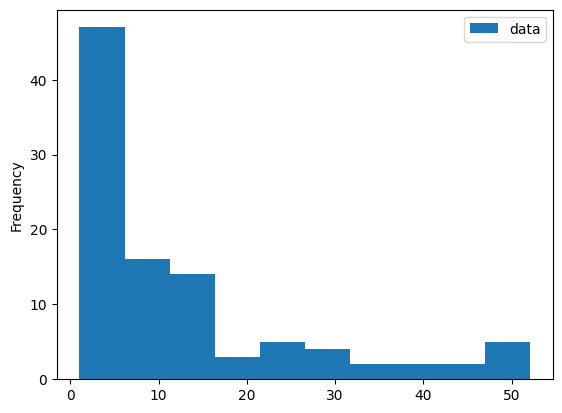

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist() # Create histogram for df dataframe

<Axes: >

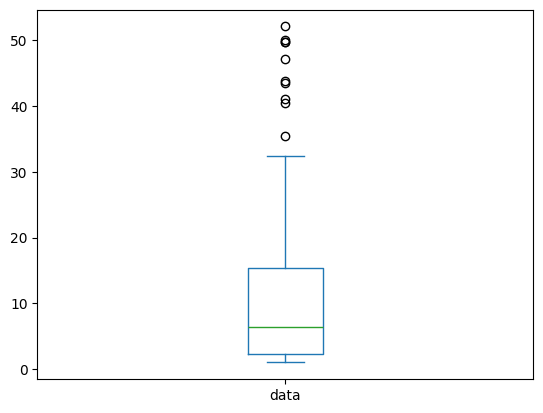

In [3]:
df.plot.box() # Create box plot for df dataframe

In [4]:
# Pros and cons of hist graphs

# Pros and cons of box graphs. 

 
# Which would you choose? 
    # According to the prompt, the main goal of these charts it help the administrator discover the how much the more 
    # expensive the pharmaceutical drugs that they sell cost in context to the prices of their other drugs. 
    # Due to this 


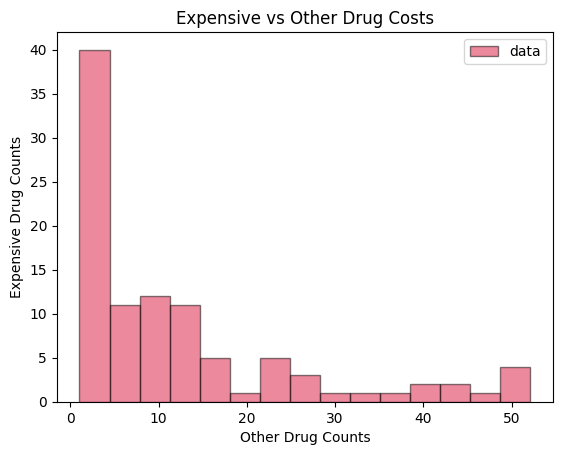

In [5]:
# Modifying Hist Graph to be more visually interesting clear, or informative
# Hist Graph Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

df.plot.hist(bins=15, edgecolor='black', ylabel='Expensive Drug Counts', xlabel='Other Drug Counts', title='Expensive vs Other Drug Costs', alpha=0.5, color='crimson'); 

# add bins to get a better since of how the data is distributed
# adding edgecolor to separate bins

<Axes: title={'center': 'Expensive vs Other Drug Costs'}, xlabel='Other Drug Counts', ylabel='Expensive Drug Counts'>

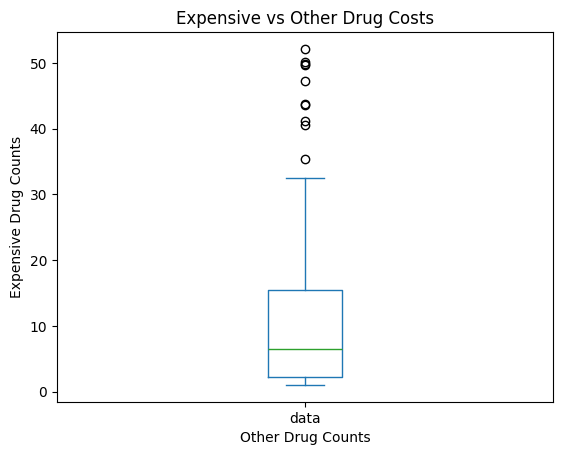

In [6]:
# Modifying Box Graph to be more visually interesting clear, or informative
# Box Graph Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html

df.plot.box(ylabel='Expensive Drug Counts', xlabel='Other Drug Counts', title='Expensive vs Other Drug Costs')

# add x and y axis labels
# add title for box plot

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [7]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [8]:
eda_df_provider = pd.read_csv('EDA_Hospital_Provider_Cost_Report_2022.csv') # Create dataframe for Hospital Provider Code Report 2022 as a part of the Healthcare Expenditure Drivers and Hospital Efficiency project

In [ ]:
# Need to seperate hospital features for value columns. Have multiple kde plots

cat_col = 'Rural Versus Urban'

id_cols = ['rpt_rec_num', 'Provider CCN', 'Zip Code', 'Medicare CBSA Number'] # Create variable with ids columns from dataset
num_cols = [c for c in eda_df_provider.select_dtypes(include=['number']).columns 
            if c not in id_cols and eda_df_provider[c].std() > 0] # Create variable with numeric columns from dataset where the column in not an id column

# Rows and Columns for KDE Subplots
cols_per_row = 3             # Set columns for subplots to 3
total_plots = len(num_cols)  # Gets the total number of subplots needs from the the num_cols variable
rows = math.ceil(total_plots / cols_per_row) # Gets the total number of rows needed for subplots by dividing the totals plots by the columns
# math.ceil documentation: https://docs.python.org/3/library/math.html#math.ceil 

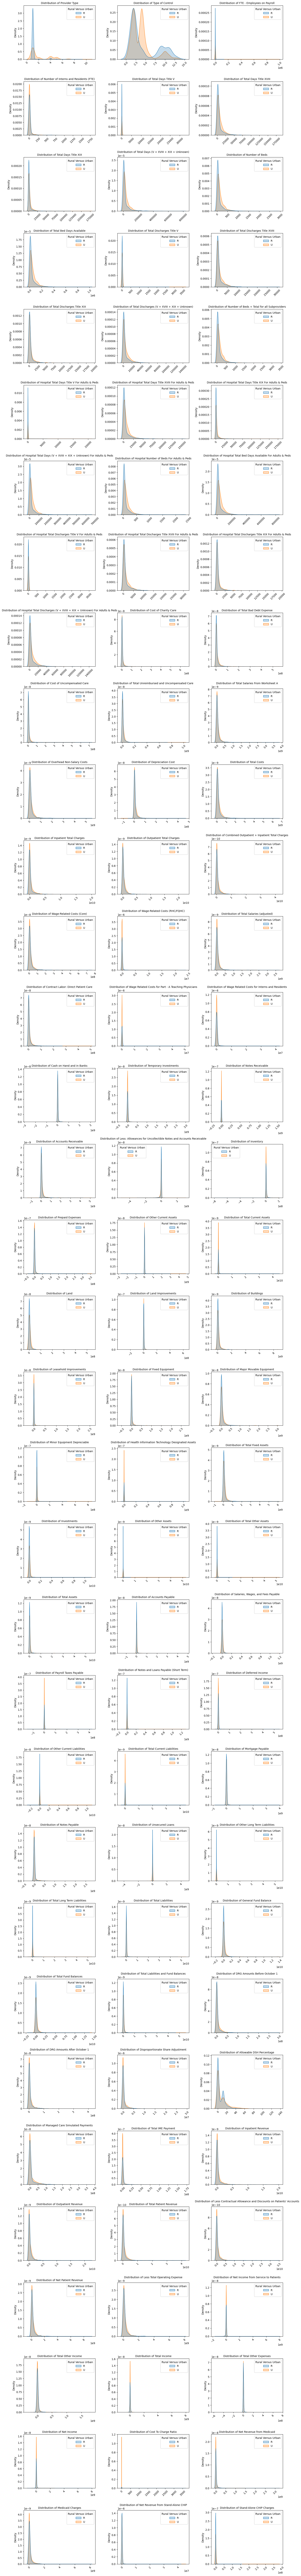

In [ ]:
# Kernel Density Estimation (KDE) Plot

# Creating subplots from cols and row variable created
fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten() 
# axes documentation: https://matplotlib.org/stable/api/axes_api.html

# Creating Loop for KDE subplots
for i, col_name in enumerate(num_cols):
    sns.kdeplot(
        data=eda_df_provider, 
        x=col_name, 
        hue=cat_col,
        fill=True, 
        common_norm=False, 
        ax=axes[i],
        warn_singular=False # Prevents crashing on columns with low variance
    )
    axes[i].set_title(f'Distribution of {col_name}', fontsize=10)
    axes[i].set_xlabel('') # Clear x-label to reduce clutter
    axes[i].tick_params(axis='x', rotation=45)
# sns.kdeplot documentation: https://seaborn.pydata.org/generated/seaborn.kdeplot.html 

plt.tight_layout()
plt.savefig("hospital_all_numeric_kde.png") # Save kde subplot to png file 
plt.show()

In [ ]:
# Swarm Plot

# Creating subplots from cols and row variable created
fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten() 
# axes documentation: https://matplotlib.org/stable/api/axes_api.html

for i, col_name in enumerate(num_cols):
    sns.swarmplot(
        data=eda_df_provider, 
        x=col_name, 
        hue=cat_col,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col_name}', fontsize=10)
    axes[i].set_xlabel('') # Clear x-label to reduce clutter
    axes[i].tick_params(axis='x', rotation=45)
# sns.swarmplot documentation: https://seaborn.pydata.org/generated/seaborn.swarmplot.html 

plt.tight_layout()
plt.savefig("hospital_all_numeric_swarm.png") # Save kde subplot to png file 
plt.show()

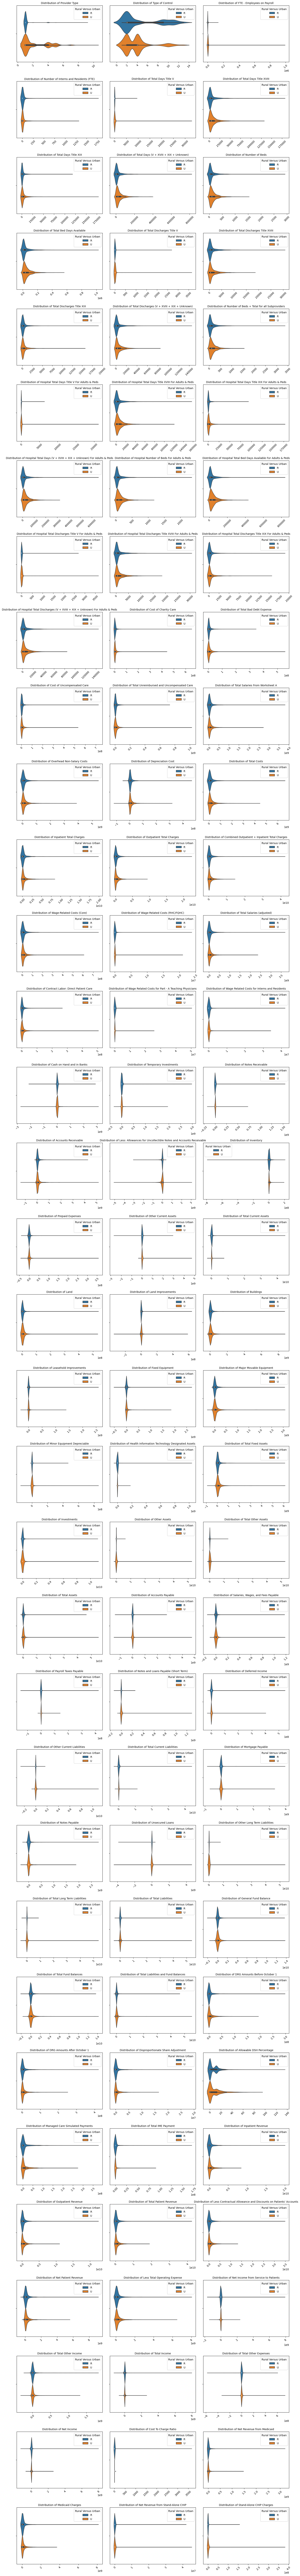

In [16]:
# Violin Plot

# Creating subplots from cols and row variable created
fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten() 
# axes documentation: https://matplotlib.org/stable/api/axes_api.html

for i, col_name in enumerate(num_cols):
    sns.violinplot(
        data=eda_df_provider, 
        x=col_name,
        fill=True, 
        hue=cat_col,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col_name}', fontsize=10)
    axes[i].set_xlabel('') # Clear x-label to reduce clutter
    axes[i].tick_params(axis='x', rotation=45)
# sns.violinplot documentation: https://seaborn.pydata.org/generated/seaborn.violinplot.html

plt.tight_layout()
plt.savefig("hospital_all_numeric_violinplot.png") # Save kde subplot to png file 
plt.show()

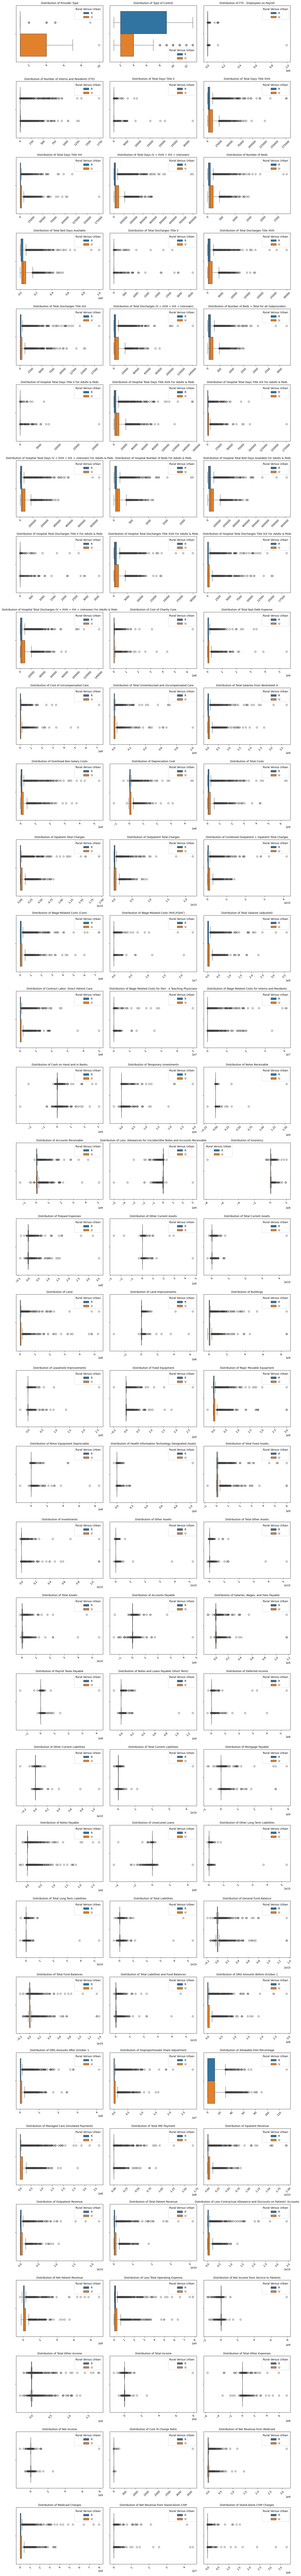

In [17]:
# Box Plot

# Creating subplots from cols and row variable created
fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten() 
# axes documentation: https://matplotlib.org/stable/api/axes_api.html

for i, col_name in enumerate(num_cols):
    sns.boxplot(
        data=eda_df_provider, 
        x=col_name,
        fill=True, 
        hue=cat_col,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of {col_name}', fontsize=10)
    axes[i].set_xlabel('') # Clear x-label to reduce clutter
    axes[i].tick_params(axis='x', rotation=45)
# sns.boxplot documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.tight_layout()
plt.savefig("hospital_all_numeric_boxplot.png") # Save boxplot subplot to png file 
plt.show()

In [ ]:
# Histogram

In [ ]:
# Grouped Histograms

In [ ]:
# Bar Plot

In [ ]:
# Mean, Medians and Modes

In [ ]:
# Conclusions

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

In [ ]:
# Reproduce graph from Storytelling With Data


labels = ['Bored','Not great','OK','Kind of interested','Excited']
percentage = [11,5,40,25,19]
colors = ['cornflowerblue','firebrick','greenyellow','slateblue','darkturquoise']